In [1]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('finger_&_earlob_data.csv')
data.head(10)

,Sex,Age,Earlob,Finger
0,male,59,94,100
1,male,55,277,293
2,male,39,97,104
3,male,65,119,122
4,male,54,96,94
5,female,50,120,118
6,male,43,83,84
7,male,63,81,84
8,male,63,78,79
9,male,52,115,100


In [4]:
#convert the sex from categorical data to numerical data by using lambda 
data['Sex']= data['Sex'].apply(lambda x: 1 if x == 'male' else (0 if x =="female" else np.nan))
data.head(10)

,Sex,Age,Earlob,Finger
0,1,59,94,100
1,1,55,277,293
2,1,39,97,104
3,1,65,119,122
4,1,54,96,94
5,0,50,120,118
6,1,43,83,84
7,1,63,81,84
8,1,63,78,79
9,1,52,115,100


In [6]:
#split data
X=data.drop(['Finger'],axis=1).values

y=data['Finger'].values
print("X= \n",X)
print("_____________________________________________")
print("y=\n",y)

X= 
 [[  1  59  94]
 [  1  55 277]
 [  1  39  97]
 [  1  65 119]
 [  1  54  96]
 [  0  50 120]
 [  1  43  83]
 [  1  63  81]
 [  1  63  78]
 [  1  52 115]
 [  0  62  99]
 [  0  48 140]
 [  0  63 116]
 [  1  41  80]
 [  0  43 107]
 [  0  77 171]
 [  1  49 108]
 [  1  25  93]
 [  0  43 140]
 [  0  48 256]
 [  0  72  98]
 [  0  21  86]
 [  0  58 131]
 [  0  65 110]
 [  0  34 171]
 [  0  45 229]
 [  0  52 154]
 [  0  72 104]
 [  0  50 380]
 [  0  59 277]
 [  0  45  93]
 [  0  34  92]
 [  0  64  78]
 [  0  25 154]
 [  0  25  86]
 [  1  22  93]
 [  1  63 228]
 [  1  58 105]
 [  1  35  77]
 [  1  43 187]
 [  1  56  88]
 [  1  22 117]
 [  1  53  92]
 [  1  43  89]
 [  1  51  87]
 [  1  71 267]
 [  1  48 127]
 [  1  64  98]
 [  0  42  80]]
_____________________________________________
y=
 [100 293 104 122  94 118  84  84  79 100 105 143 120  94 114 176  90  99
 149 245  92  89 146 120 167 246 155 108 380 265  96 108  76 189  88  95
 223  99  80 197  89 127  90  95  88 261 133 109  91]


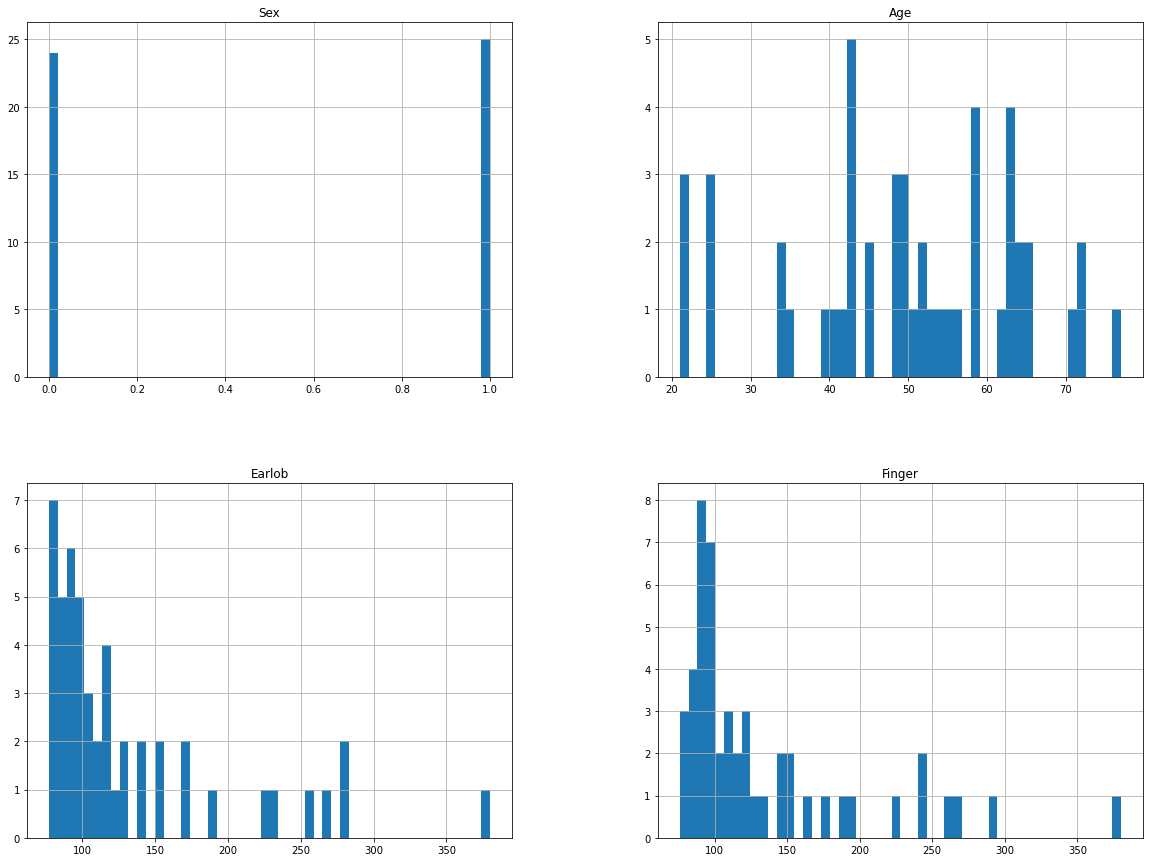

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
data.describe()

,Sex,Age,Earlob,Finger
count,49.000000,49.000000,49.000000,49.000000
mean,0.510204,49.673469,131.591837,135.000000
std,0.505076,14.270289,66.407805,66.150397
min,0.000000,21.000000,77.000000,76.000000
25%,0.000000,43.000000,92.000000,92.000000
50%,1.000000,50.000000,105.000000,108.000000
75%,1.000000,62.000000,140.000000,149.000000
max,1.000000,77.000000,380.000000,380.000000


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [10]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=lr.predict(x_test)

In [12]:
print(y_pred)

[110.88962061 117.32127666  93.66545388 110.50424967 101.91999788
  89.1645298   97.05231155  84.54958595 113.06074358  94.24790416]


In [13]:
print(y_test,'\n',y_pred)

[120 120  90  90  95  88 109  94 114 100] 
 [110.88962061 117.32127666  93.66545388 110.50424967 101.91999788
  89.1645298   97.05231155  84.54958595 113.06074358  94.24790416]


In [14]:
z=y_test-y_pred
print(z)

[  9.11037939   2.67872334  -3.66545388 -20.50424967  -6.91999788
  -1.1645298   11.94768845   9.45041405   0.93925642   5.75209584]


array([[<AxesSubplot:xlabel='Finger', ylabel='Finger'>,
        <AxesSubplot:xlabel='Earlob', ylabel='Finger'>,
        <AxesSubplot:xlabel='Sex', ylabel='Finger'>,
        <AxesSubplot:xlabel='Age', ylabel='Finger'>],
       [<AxesSubplot:xlabel='Finger', ylabel='Earlob'>,
        <AxesSubplot:xlabel='Earlob', ylabel='Earlob'>,
        <AxesSubplot:xlabel='Sex', ylabel='Earlob'>,
        <AxesSubplot:xlabel='Age', ylabel='Earlob'>],
       [<AxesSubplot:xlabel='Finger', ylabel='Sex'>,
        <AxesSubplot:xlabel='Earlob', ylabel='Sex'>,
        <AxesSubplot:xlabel='Sex', ylabel='Sex'>,
        <AxesSubplot:xlabel='Age', ylabel='Sex'>],
       [<AxesSubplot:xlabel='Finger', ylabel='Age'>,
        <AxesSubplot:xlabel='Earlob', ylabel='Age'>,
        <AxesSubplot:xlabel='Sex', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>]], dtype=object)

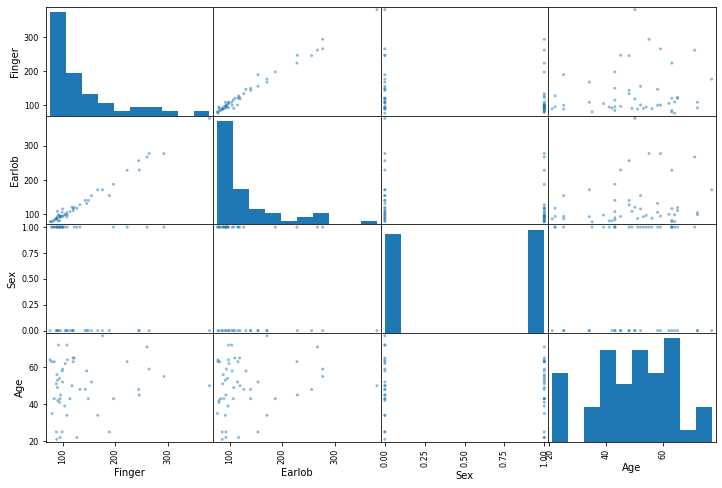

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["Finger",  "Earlob",
"Sex","Age"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [17]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.161349641314231

In [18]:
from sklearn import metrics
#print result of mae
print("mae",metrics.mean_absolute_error(y_test,y_pred))
print("mse",metrics.mean_squared_error(y_test,y_pred))
print("rmse",(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

mae 7.213278871948651
mse 83.9303272504084
rmse 9.161349641314231


C:\Users\emana\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


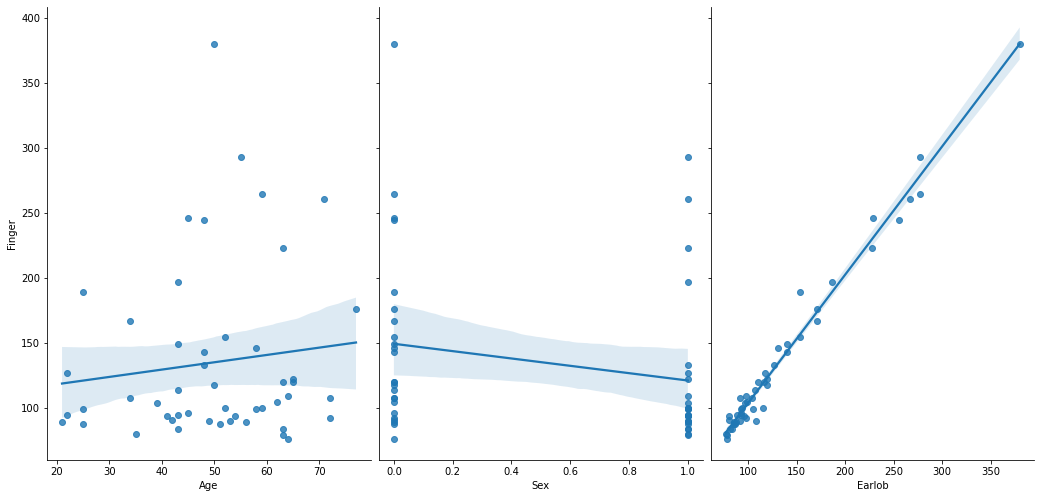

In [19]:
import seaborn as sns

sns.pairplot(data, x_vars=['Age','Sex','Earlob'], y_vars='Finger', size=7, aspect=0.7, kind='reg')
